# Exercise 1: plotting an image from a FITS file

Using NumPy, Matplotlib, and Astropy, read in the file `lmc_ha_b20.fits` and do the following:  
- Get the image data from the first HDU.

In [2]:
#Code Here
import astropy
from astropy.io import fits
hdulist = fits.open("lmc.ha.b20.fits")
imdata = hdulist[0].data

FileNotFoundError: [Errno 2] No such file or directory: 'lmc.ha.b20.fits'

- Take the common logarithm of the image data.


In [ ]:
#Code Here
import numpy as np
imlog = np.log10(imdata)

C:\Users\Maxwell Fazen\AppData\Local\Temp\ipykernel_34992\1997808700.py:3: RuntimeWarning: divide by zero encountered in log10
  imlog = np.log10(imdata)


- Get the first HDU's keywords `NAXIS1`, `NAXIS2`, `CDELT1`, and `CDELT2` (the latter two are in degrees/pixel). Use this information to compute the extent of the image. (Use the abs value of `CDELT1`... RA goes backwards)


In [ ]:
#Code Here
imheader = hdulist[0].header
NAXIS1 = imheader["NAXIS1"]
NAXIS2 = imheader["NAXIS2"]
#Converting to arcseconds
CDELT1 = abs(imheader["CDELT1"])*3600
CDELT2 = imheader["CDELT2"]*3600
xextent = NAXIS1*CDELT1
yextent = NAXIS2*CDELT2
print("The extent of the image is:",xextent,"arcseconds by",yextent,"arcseconds.")


The extent of the image is: 32399.999517202225 arcseconds by 32399.99951720242 arcseconds.


- Plot the log image using the extent determined by the above keywords and placing the origin at lower left.


Text(0.5, 1.0, 'Imc.ha.b20.fits')

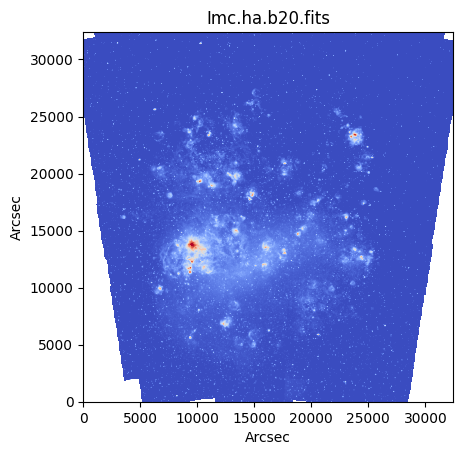

In [ ]:
#Code Here
from matplotlib import pyplot as plt
plt.imshow(imlog,extent=[0,xextent,0,yextent],origin="lower",cmap="coolwarm",vmin=-.25,vmax=1.5)
plt.xlabel("Arcsec")
plt.ylabel("Arcsec")
plt.title("Imc.ha.b20.fits")

# Exercise 2: modifying a FITS table


- The files `table1.fits` and `table2.fits` each contain an empty primary HDU and a binary table extension HDU. The table data are drawn from a sample of nearby clusters of galaxies.  
  
- The file `table1.fits` contains: cluster name, redshift, RA (J2000) and dec (J2000).  

- The file `table2.fits` contains: cluster name, 2-10 keV X-ray luminosity, X-ray temperature in keV.

- Using NumPy and Astropy, read the two files in, merge the tables into one new table, and write the results to a new file `newtable.fits`.





In [ ]:
#Code Here
from astropy.table import Table

T1 = Table.read("table1.fits",hdu=1)
T2 = Table.read("table2.fits",hdu=1)
T3 = astropy.table.join(T1,T2,keys="name")
T3.write("newtable.fits",format = "fits",overwrite=True)

In [ ]:
%%capture
# Here we use a script to generate pdf and save it to google drive.

# After executing this cell, you will be asked to link to your GoogleDrive account.
# Then, the pdf will be generated and saved to your GoogleDrive account and you need to go there to download;

from google.colab import drive
drive.mount('/content/drive')
# install tex; first run may take several minutes
! apt-get install texlive-xetex
# file path and save location below are default; please change if they do not match yours
! jupyter nbconvert --output-dir='/content/drive/MyDrive/' '/content/drive/MyDrive/Colab Notebooks/lec18_ASTR310.ipynb' --to pdf